<a href="https://colab.research.google.com/github/WanjikuKim/MedicalCampAnalysis/blob/main/MEDICALCAMP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
#from mlxtend.plotting import plot_confusion_matrix


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense


In [ ]:
#DATA LOADING AND CLEANING

In [ ]:
Med_Camp = pd.read_csv('/content/I.Insurance.csv')
Med_Camp.head()

,AGE,SEX,BMI,CHILDREN,SUBSTANCE ABUSE,AFRICA REGION,FREQUENTLY ILL,CHARGES
0,19,female,27.900,0,yes,southwest,1,16884.92400
1,18,male,33.770,1,no,southeast,1,1725.55230
2,28,male,33.000,3,no,southeast,1,4449.46200
3,33,male,22.705,0,no,northwest,1,21984.47061
4,32,male,28.880,0,no,northwest,0,3866.85520


In [ ]:
Med_Camp.dtypes

AGE                  int64
SEX                 object
BMI                float64
CHILDREN             int64
SUBSTANCE ABUSE     object
AFRICA REGION       object
FREQUENTLY ILL       int64
CHARGES            float64
dtype: object

In [ ]:
Med_Camp.shape

(1338, 8)

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [ ]:
profile = ProfileReport(Med_Camp, title = "Pandas Profiling Report")
profile 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
Med_Camp.isna().any()

AGE                False
SEX                False
BMI                False
CHILDREN           False
SUBSTANCE ABUSE    False
AFRICA REGION      False
FREQUENTLY ILL     False
CHARGES            False
dtype: bool

In [ ]:
Med_Camp.describe()

,AGE,BMI,CHILDREN,FREQUENTLY ILL,CHARGES
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,0.627055,13270.422265
std,14.049960,6.098187,1.205493,0.483768,12110.011237
min,18.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,1.000000,16639.912515
max,64.000000,53.130000,5.000000,1.000000,63770.428010


In [ ]:
Med_Camp.duplicated().sum()

1

In [ ]:
Med_Camp.isnull().sum()

AGE                0
SEX                0
BMI                0
CHILDREN           0
SUBSTANCE ABUSE    0
AFRICA REGION      0
FREQUENTLY ILL     0
CHARGES            0
dtype: int64

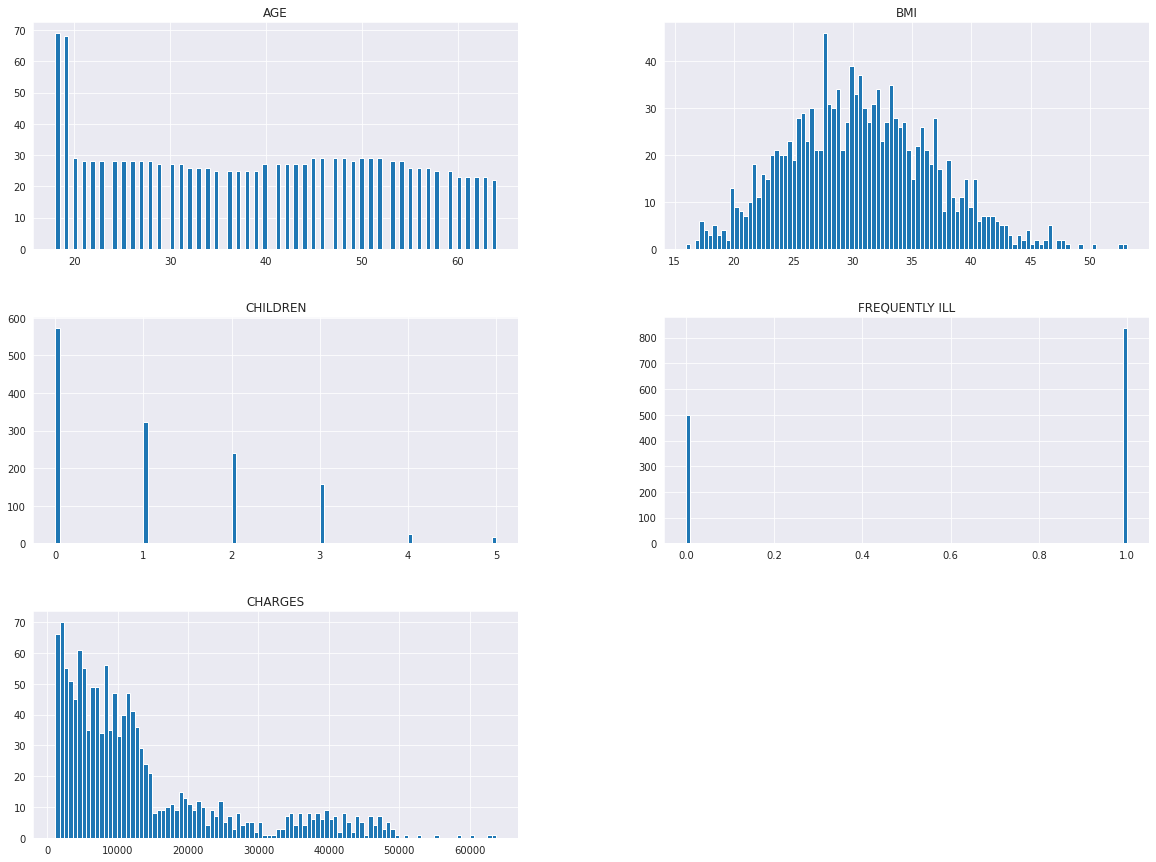

In [ ]:
Med_Camp.hist(bins = 100, figsize = (20,15))
plt.show()

In [ ]:
import seaborn as sns


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

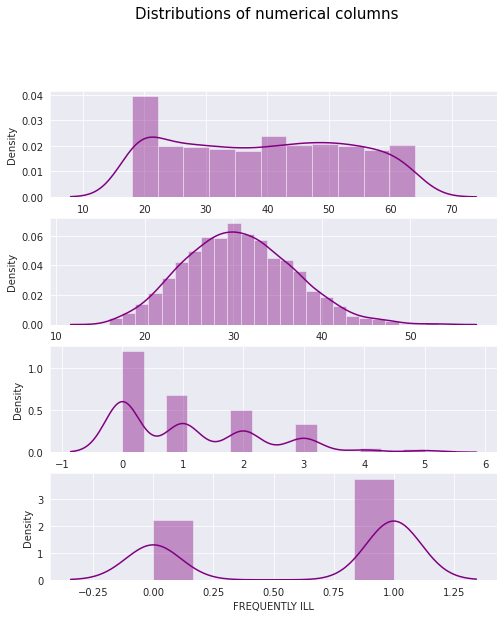

In [ ]:
columns = ['AGE','BMI','CHILDREN', 'FREQUENTLY ILL']

sns.set_style('darkgrid')
fig, axes = plt.subplots(len(columns), figsize = (8, 9))
fig.suptitle('Distributions of numerical columns', y= 1.01, color = 'black', fontsize = 15)

for ax, data, name in zip(axes.flatten(), Med_Camp, columns):
  sns.distplot(Med_Camp[name], ax = ax, kde = True, color = 'purple')

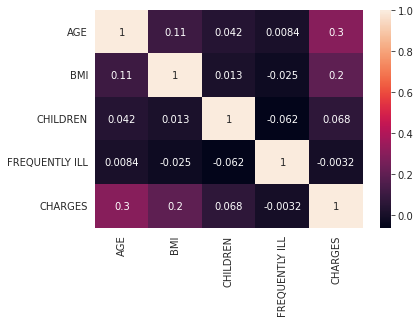

In [ ]:
sns.heatmap(Med_Camp.corr(), annot=True)
plt.show()

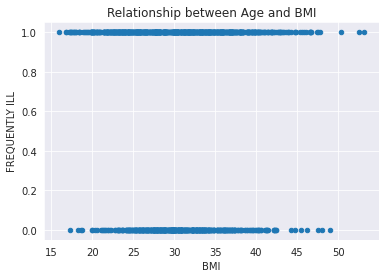

In [ ]:
Med_Camp.plot.scatter(x ='BMI', y= 'FREQUENTLY ILL')
plt.title('Relationship between Age and BMI')
plt.show()

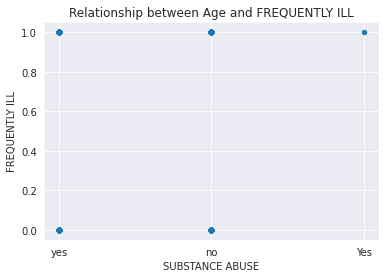

In [ ]:
Med_Camp.plot.scatter(x ='SUBSTANCE ABUSE', y= 'FREQUENTLY ILL')
plt.title('Relationship between Age and FREQUENTLY ILL')
plt.show()

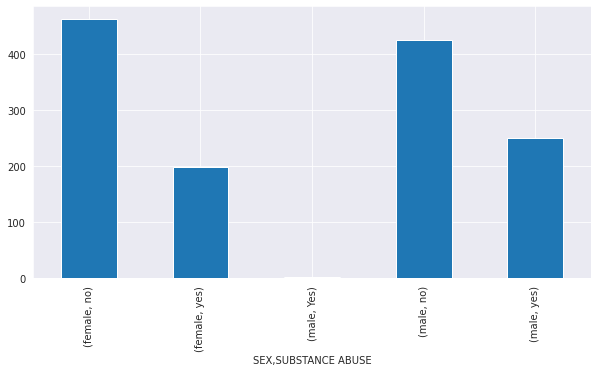

In [ ]:
plt.figure(figsize=(10,5))
Med_Camp.groupby(["SEX", "SUBSTANCE ABUSE"])["SUBSTANCE ABUSE"].count().plot(kind = 'bar')

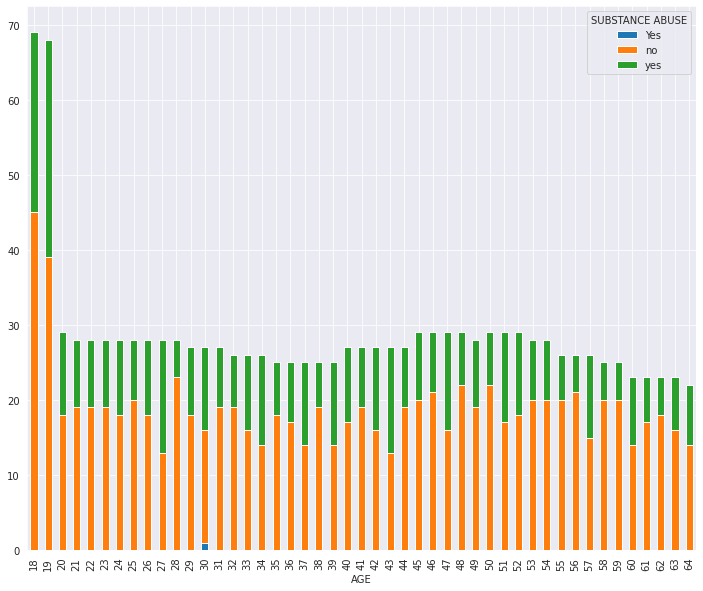

In [ ]:
pd.crosstab(Med_Camp['AGE'], Med_Camp['SUBSTANCE ABUSE']).plot(kind='bar', stacked=True, figsize=(12,10))

A large percentage of people do not partake to substance abuse but those that do are within the 18 - 20. People at the ages of 27, 30, 37 and 43 are also significantly high consumers of substances abuse.

In [ ]:
for column in columns:
  print(column +':' + str(Med_Camp[column].median()))

AGE:39.0
BMI:30.4
CHILDREN:1.0
FREQUENTLY ILL:1.0


In [ ]:
for column in columns:
  print(column +':' + str(Med_Camp[column].mode()))

AGE:0    18
dtype: int64
BMI:0    32.3
dtype: float64
CHILDREN:0    0
dtype: int64
FREQUENTLY ILL:0    1
dtype: int64


## ** Tensor Flow Model - To be used with ANN Algorithm**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Import a standardization library
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
C_C = ['SEX', 'SUBSTANCE ABUSE']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Med_Camp[C_C] = Med_Camp[C_C].apply(lambda col:le.fit_transform(col))

In [ ]:
Med_Camp.dtypes

AGE                  int64
SEX                  int64
BMI                float64
CHILDREN             int64
SUBSTANCE ABUSE      int64
AFRICA REGION       object
CHARGES            float64
dtype: object

In [ ]:
Med_Camp.pop('AFRICA REGION')

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: AFRICA REGION, Length: 1338, dtype: object

In [ ]:
Med_Camp.head()

,AGE,SEX,BMI,CHILDREN,SUBSTANCE ABUSE,FREQUENTLY ILL,CHARGES
0,19,0,27.900,0,2,1,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,1,21984.47061
4,32,1,28.880,0,1,0,3866.85520


In [ ]:
X = Med_Camp.iloc[:, 0:5].values
y = Med_Camp.iloc[: , 5].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = Sequential()
model.add(Dense(X.shape[1], activation='relu', input_dim = X.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size = 10, epochs = 10, verbose = 1)
y_pred = model(X_test)

Epoch 1/10
107/107 [==============================] - 1s 2ms/step - loss: 0.6589 - accuracy: 0.6318
Epoch 2/10
107/107 [==============================] - 0s 1ms/step - loss: 0.6449 - accuracy: 0.6421
Epoch 3/10
107/107 [==============================] - 0s 2ms/step - loss: 0.6408 - accuracy: 0.6383
Epoch 4/10
107/107 [==============================] - 0s 2ms/step - loss: 0.6364 - accuracy: 0.6477
Epoch 5/10
107/107 [==============================] - 0s 2ms/step - loss: 0.6313 - accuracy: 0.6505
Epoch 6/10
107/107 [==============================] - 0s 1ms/step - loss: 0.6286 - accuracy: 0.6495
Epoch 7/10
107/107 [==============================] - 0s 2ms/step - loss: 0.6249 - accuracy: 0.6449
Epoch 8/10
107/107 [==============================] - 0s 2ms/step - loss: 0.6222 - accuracy: 0.6505
Epoch 9/10
107/107 [==============================] - 0s 2ms/step - loss: 0.6200 - accuracy: 0.6551
Epoch 10/10
107/107 [==============================] - 0s 2ms/step - loss: 0.6159 - accuracy: 0.6551

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
[Loss, accuracy_score] = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3408 - accuracy: 0.8625


In [ ]:
Loss

0.3408063054084778

In [ ]:
accuracy_score

0.862500011920929

# **MODEL COMPARISON**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, roc_auc_score, f1_score

In [ ]:
models ={'Model':[ 'Random Forest','Ada Boost','Linear SVC',
                  'Polynomial SVC'],
         'Accuracy':[0,0,0,0],
         'f1_score':[0,0,0,0]}

Med_results = pd.DataFrame(models,columns=['Model','Accuracy','f1_score'])

def model_results(model_type, y_test_data, y_pred_data):
  index_val = Med_results[Med_results['Model']==model_type].index

  Med_results.loc[index_val,'Accuracy']= accuracy_score(y_test_data, y_pred_data)
  Med_results.loc[index_val,'f1_score']= f1_score(y_test_data, y_pred_data)
  
  return Med_results

In [ ]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=1)

# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(degree=1, kernel='poly')

In [ ]:
y_pred = polyclassifier.predict(X_test)

In [ ]:
# Checking the metrics of the model
model_results('Polynomial SVC',y_test, y_pred)

,Model,Accuracy,f1_score
0,Random Forest,0.0000,0.0
1,Ada Boost,0.0000,0.0
2,Linear SVC,0.0000,0.0
3,Polynomial SVC,0.7965,0.0


In [ ]:
forest = RandomForestClassifier(n_estimators = 100, random_state=60, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)

# printing the metrics 
model_results('Random Forest',y_test, y_pred)

,Model,Accuracy,f1_score
0,Random Forest,0.8500,0.460432
1,Ada Boost,0.0000,0.000000
2,Linear SVC,0.0000,0.000000
3,Polynomial SVC,0.7965,0.000000


In [ ]:
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),
                          n_estimators=200, random_state=60)
# fitting the model to our train data
ada_boost = ada_boost.fit(X_train, y_train)

# making predictions
y_pred= ada_boost.predict(X_test)

# printing the metrics 
model_results('Ada Boost',y_test, y_pred)

,Model,Accuracy,f1_score
0,Random Forest,0.8500,0.460432
1,Ada Boost,0.8140,0.477528
2,Linear SVC,0.0000,0.000000
3,Polynomial SVC,0.7965,0.000000


In [ ]:
# Checking the accurancy of the model
model_results('Linear SVC',y_test, y_pred)

,Model,Accuracy,f1_score
0,Random Forest,0.8500,0.460432
1,Ada Boost,0.8140,0.477528
2,Linear SVC,0.8140,0.477528
3,Polynomial SVC,0.7965,0.000000


The ANN Model does the best as opposed to the rest of the models but the Random Forest comes in pretty close.

## **Conclusions**

a) The age, BMI and Substance Abuse all seem to affect the frequency of falling ill.

b)  Factors like Africa region have little to no effect to the frequency of falling ill.

c) The model applied has a high accuracy score at predicting the charges since thereis a high chance of falling ill to begin with.

d) Contrary to popular opinion, having children has little to impact to the frequency of falling ill.



# **Recommendations**
Life-style choices have a higher impact to the frequency of falling as opposed to the physical surrounding and as such, the individuals should make better life choices. eg. Use less harmful substances

The model has a high accuracy score but there is a need for insurance companies to re-examine the factors they cast their prices on because factors like having children have no impact.
